In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
X = np.asarray([[0, 1, 2, 3, 4, 5, 6]]).T
y = np.asarray([0, 3, 7, -1, 0, 5, 10])
m,n=X.shape

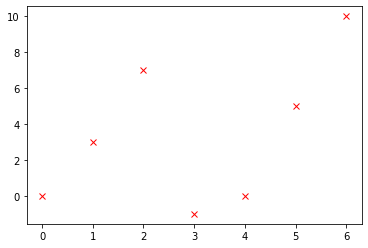

In [115]:
plt.plot(X, y, 'rx')


In [116]:
# Add a bias factor to X.
X = np.hstack((np.ones((m, 1)), X))


In [117]:
X = np.hstack((
    X,
    (X[:, 1] ** 2).reshape((m, 1)),
    (X[:, 1] ** 3).reshape((m, 1)),
))
m, n = X.shape

In [118]:
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)


In [119]:
def h(X, theta):
  return X @ theta


In [120]:
theta = np.random.rand(n)
predictions = h(X, theta)


In [121]:
theta.shape

(4,)

In [122]:
b1=[0,1,10]

In [123]:
X.shape

(7, 4)

In [124]:
def J(theta, X, y):
  return np.mean(np.square(h(X, theta) - y)+b*(theta.T@theta))


In [125]:
theta1=[]
i1=[]
for b in b1:
  alpha = 0.01
  d_theta=(1/m) * (X.T @ ((X @ theta) - y)+b*theta)
  dd_theta=(X.T@X+b)
  theta = theta - alpha*(np.linalg.inv(dd_theta)@d_theta)
  losses = []
  l_old=0
  l=1
  i=0
  # stopping criteria l-l_old>0.001
  while(np.abs(l-l_old)>0.001):
    l_old=J(theta, X, y)
    # print(l_old)
    d_theta=(1/m) * (X.T @ ((X @ theta) - y)+b*theta)
    dd_theta=(X.T@X+b)
    theta = theta - alpha*(np.linalg.inv(dd_theta)@d_theta)
    l=J(theta, X, y)
    # print(l)
    i+=1
    # losses.append(l)
  theta1.append(theta)
  i1.append(i)


In [126]:
theta1

[array([  2.98606057,  11.86758786, -35.70840872,  26.7362558 ]),
 array([ 3.02206176, -0.36085808,  0.49201851,  2.05653201]),
 array([1.44658048, 0.35916896, 0.52644213, 0.71630921])]

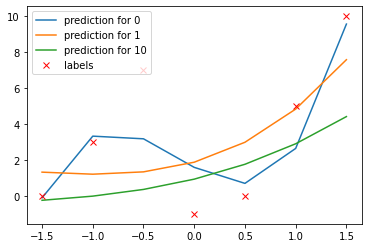

In [127]:
for i in range(len(b1)):
    prediction = h(X, theta1[i])
    plt.plot(X[:, 1], prediction, label='prediction for '+str(b1[i]))
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()

In [128]:
theta1

[array([  2.98606057,  11.86758786, -35.70840872,  26.7362558 ]),
 array([ 3.02206176, -0.36085808,  0.49201851,  2.05653201]),
 array([1.44658048, 0.35916896, 0.52644213, 0.71630921])]

In [129]:
i1

[1347, 864, 4575]